<a href="https://colab.research.google.com/github/RishiShah99/Cifar-10/blob/main/Model_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR 10 Classification

##1. Convolutional Neural Network Version 1

###Creating the datasets and dataloaders

In [33]:
# Necessary imports
import torch
import torchvision
import torchvision.transforms as transforms

In [34]:
# Data Augmentation applied to assist the neural network
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [35]:
# Batch Size hyperparameter
batch_size = 4

# Creating the train/test sets and loaders
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False, num_workers = 2)

# All possible classes for the CIFAR-10 datasets
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


###Visualizing Data

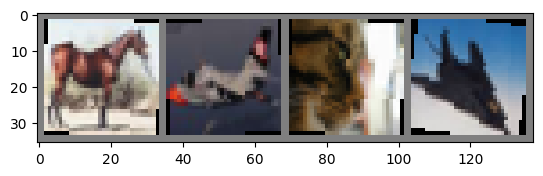

horse plane cat   plane


In [36]:
# Creating a method to visualize the data images with matplotlib
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

###Building Version 1 Convolutional Neural Network:
- My first version without convolutional layers only had a 15% accuracy
- Convolutional should be able to score much higher accuracy

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class CIFARModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Creating convolutional and linear layers
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)

  # Define forward pass of the network
  def forward(self, x):
    # Convolutional layers, followed by relu activation and max pooling
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    # Flatten output tensor from the conv. layers
    x = torch.flatten(x, 1)

    # Fully connected layers with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    # Output layer
    x = self.fc3(x)
    return x

In [38]:
# Creating model_1
model_1 = CIFARModelV1()

Defining a loss function and optimizer

In [39]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr = 0.001, momentum = 0.9)

###Training and Testing

In [40]:
# Training the neural network for 10 epochs
for epoch in range(10):
  running_loss = 0.0  # Variable to keep track of the running loss for each epoch

  # Iterate over the data batches in the training loader
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data  # Get the input data and corresponding labels

    optimizer.zero_grad()  # Zero the gradients to prevent accumulation

    outputs = model_1(inputs)  # Forward pass: compute the predicted outputs

    loss = criterion(outputs, labels)  # Compute the loss between predicted outputs and actual labels

    loss.backward()  # Backpropagation: compute gradients of loss with respect to model parameters

    optimizer.step()  # Update model parameters using optimizer

    running_loss += loss.item()  # Accumulate the loss for printing

    # Print running loss every 2000 mini-batches
    if i % 2000 == 1999:
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0  # Reset running loss for the next set of mini-batches

# Training completed
print('Finished Training')

[1,  2000] loss: 2.197
[1,  4000] loss: 1.904
[1,  6000] loss: 1.710
[1,  8000] loss: 1.612
[1, 10000] loss: 1.557
[1, 12000] loss: 1.516
[2,  2000] loss: 1.448
[2,  4000] loss: 1.419
[2,  6000] loss: 1.387
[2,  8000] loss: 1.356
[2, 10000] loss: 1.360
[2, 12000] loss: 1.325
[3,  2000] loss: 1.297
[3,  4000] loss: 1.281
[3,  6000] loss: 1.264
[3,  8000] loss: 1.254
[3, 10000] loss: 1.262
[3, 12000] loss: 1.243
[4,  2000] loss: 1.210
[4,  4000] loss: 1.201
[4,  6000] loss: 1.195
[4,  8000] loss: 1.204
[4, 10000] loss: 1.175
[4, 12000] loss: 1.195
[5,  2000] loss: 1.153
[5,  4000] loss: 1.136
[5,  6000] loss: 1.164
[5,  8000] loss: 1.161
[5, 10000] loss: 1.137
[5, 12000] loss: 1.115
[6,  2000] loss: 1.114
[6,  4000] loss: 1.100
[6,  6000] loss: 1.108
[6,  8000] loss: 1.132
[6, 10000] loss: 1.106
[6, 12000] loss: 1.083
[7,  2000] loss: 1.037
[7,  4000] loss: 1.092
[7,  6000] loss: 1.095
[7,  8000] loss: 1.081
[7, 10000] loss: 1.072
[7, 12000] loss: 1.081
[8,  2000] loss: 1.028
[8,  4000] 

In [41]:
# Saving the trained model
PATH = './cifar_net.pth'
torch.save(model_1.state_dict(), PATH)

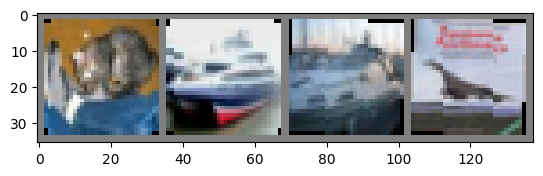

GroundTruth:  cat   ship  ship  plane


In [42]:
dataiter = iter(testloader)
images,labels = next(dataiter)

# Printing images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [43]:
# Loading the saved model
model_2 = CIFARModelV1()
model_2.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [44]:
outputs = model_2(images)

In [45]:
# Initialize variables to keep track of correct and total predictions
correct = 0
total = 0

# Disable gradient calculation since we're only evaluating the network
with torch.no_grad():
  # Iterate over the test dataset
  for data in testloader:
    images, labels = data  # Get the test images and their labels

    outputs = model_2(images)  # Perform forward pass to get the predicted outputs

    # Choose the class with the highest probability as the predicted class
    _, predicted = torch.max(outputs.data, 1)

    # Increment the total count by the number of labels in the batch
    total += labels.size(0)

    # Increment correct count by the number of correctly predicted labels in the batch
    correct += (predicted == labels).sum().item()

# Print the accuracy of the network on the test dataset
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')

Accuracy of the network on the 10000 test images: 61%


In [46]:
# Initialize dictionaries to keep track of correct predictions and total predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Disable gradient calculation since we're only evaluating the network
with torch.no_grad():
  # Iterate over the test dataset
  for data in testloader:
    images, labels = data  # Get the test images and their labels

    outputs = model_2(images)  # Perform forward pass to get the predicted outputs

    _, predictions = torch.max(outputs, 1)  # Choose the class with the highest probability as the predicted class

    # Update correct_pred and total_pred dictionaries based on predictions
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1  # Increment correct prediction count for the corresponding class
      total_pred[classes[label]] += 1  # Increment total prediction count for the corresponding class

# Iterate over the classes and print accuracy for each class
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f}%')


Accuracy for class: plane is 70.5%
Accuracy for class: car   is 77.6%
Accuracy for class: bird  is 57.4%
Accuracy for class: cat   is 39.9%
Accuracy for class: deer  is 49.0%
Accuracy for class: dog   is 49.7%
Accuracy for class: frog  is 72.4%
Accuracy for class: horse is 70.2%
Accuracy for class: ship  is 70.2%
Accuracy for class: truck is 58.7%


###To test sending the device to the GPU:

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print (device)

cuda:0


In [16]:
model_2.to(device)

CIFARModelV1(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
inputs,labels = data[0].to(device), data[1].to(device)

## 2. Larger Convolutional Neural Network
* This is to see if I can increase the accuracy from the first neural network by changing the size of the neural network as well as changing the optimizer to ADAM instead of SGD
* All imports and dataloaders will be created again so cells above this part don't have to run again.

###2.1. Creating the datasets and dataloaders

In [18]:
# Necessary Imports
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print (torch.__version__)
print (torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [19]:
# Performing data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [20]:
# Setup train and test data
train_data = datasets.CIFAR10(
    root = '/data',
    train = True,
    download = True,
    transform = transform
)

test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 170498071/170498071 [00:03<00:00, 43551811.28it/s]


Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


In [21]:
# Checking the sizes of each
len(train_data), len(test_data)

(50000, 10000)

In [22]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [23]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [24]:
from torch.utils.data import DataLoader

# Batch size hyperparameters
BATCH_SIZE = 4

# Creating the dataloaders
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")
train_dataloader, test_dataloader

Length of train dataloader: 12500 batches of 4
Length of test dataloader: 2500 batches of 4


(<torch.utils.data.dataloader.DataLoader at 0x7bb7b6fa7fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bb7b6fa7f40>)

### 2.2. Visualizing some of the data

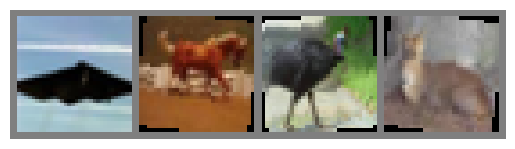

airplane horse bird  deer 


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Turn off axis
    plt.show()

dataiter = iter(train_dataloader)
images, labels = next(dataiter)

num_images = 4
imshow(torchvision.utils.make_grid(images[:num_images]))  # Display first 4 images
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(num_images)))  # Print labels for first 4 images

###2.3 Setting up device-agnostic code and importing helper_functions

In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print (device)

cuda:0


###2.4 Creating a larger convolutional neural network
* Using nn.ReLU

In [27]:
import torch
from torch import nn

class LargeCNN(nn.Module):
  def __init__(self, input_shape=(3, 32, 32), hidden_units=32, output_shape=10):
    super().__init__()

    # First convolutional block
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),  # ReLU activation function
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),  # ReLU activation function
      nn.MaxPool2d(kernel_size=2)  # Max pooling layer
    )

    # Second convolutional block
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),  # ReLU activation function
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),  # ReLU activation function
      nn.MaxPool2d(kernel_size=2)  # Max pooling layer
    )

    # Fully connected classifier
    self.classifier = nn.Sequential(
      nn.Flatten(),  # Flatten the input for fully connected layers
      nn.Linear(in_features=hidden_units * (input_shape[1] // 4) * (input_shape[2] // 4), out_features=output_shape)  # Linear layer
    )

  def forward(self, x):
    # Forward pass through convolutional blocks
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)

    # Forward pass through fully connected layers
    x = self.classifier(x)
    return x


In [28]:
torch.manual_seed(42)
model_3 = LargeCNN()

# Sending model_3 to device
model_3.to(device)

LargeCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
)

### 2.5. Setting up evaluation metrics and loss function and optimizer

In [29]:
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
# Loss function
loss_fn = nn.CrossEntropyLoss()

### 2.6 Training and testing through functions

In [30]:
# Training the neural network
for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # Making it all device agnostic code
    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    outputs = model_3(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print(f'[{epoch +1}, {i+1:5d}] loss: {running_loss/2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.881
[1,  4000] loss: 1.577
[1,  6000] loss: 1.454
[1,  8000] loss: 1.379
[1, 10000] loss: 1.309
[1, 12000] loss: 1.270
[2,  2000] loss: 1.218
[2,  4000] loss: 1.185
[2,  6000] loss: 1.183
[2,  8000] loss: 1.143
[2, 10000] loss: 1.135
[2, 12000] loss: 1.105
[3,  2000] loss: 1.064
[3,  4000] loss: 1.079
[3,  6000] loss: 1.074
[3,  8000] loss: 1.085
[3, 10000] loss: 1.064
[3, 12000] loss: 1.058
[4,  2000] loss: 1.026
[4,  4000] loss: 1.029
[4,  6000] loss: 1.031
[4,  8000] loss: 1.012
[4, 10000] loss: 1.030
[4, 12000] loss: 1.025
[5,  2000] loss: 0.992
[5,  4000] loss: 0.998
[5,  6000] loss: 1.007
[5,  8000] loss: 1.001
[5, 10000] loss: 0.969
[5, 12000] loss: 1.014
[6,  2000] loss: 0.976
[6,  4000] loss: 0.961
[6,  6000] loss: 0.981
[6,  8000] loss: 0.973
[6, 10000] loss: 0.983
[6, 12000] loss: 0.989
[7,  2000] loss: 0.950
[7,  4000] loss: 0.990
[7,  6000] loss: 0.960
[7,  8000] loss: 0.957
[7, 10000] loss: 0.980
[7, 12000] loss: 0.957
[8,  2000] loss: 0.952
[8,  4000] 

In [31]:
# To see how the network performs on the whole dataset
correct = 0
total = 0

with torch.no_grad():
  for data in test_dataloader:
    # Device Agnostic
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model_3(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print (f'Accuracy of the network on the 10000 test images: {100*correct // total}%')

Accuracy of the network on the 10000 test images: 63%


In [32]:
# See accuracy based on the 10 classes
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in test_dataloader:
    # Device agnostic
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model_3(images)
    _, predictions = torch.max(outputs, 1)
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100*float(correct_count) / total_pred [classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 74.5 %
Accuracy for class: automobile is 82.5 %
Accuracy for class: bird  is 40.1 %
Accuracy for class: cat   is 38.4 %
Accuracy for class: deer  is 58.2 %
Accuracy for class: dog   is 46.9 %
Accuracy for class: frog  is 92.2 %
Accuracy for class: horse is 69.8 %
Accuracy for class: ship  is 69.8 %
Accuracy for class: truck is 66.1 %
